In [3]:
import pandas as pd
import umap
from matplotlib import pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [4]:
df = pd.read_csv('spotify_with_genre.csv')

In [5]:
df.head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language,track_genre
0,0BBAcsIw7RYLtHFTNJUQFe,Knockout Song - Ambient Lofi,"Anirudh Ravichander, Madley Blues, Vignesh Shi...",2024,12,https://i.scdn.co/image/ab67616d0000b2738aa5c0...,Knockout Song (Ambient Lofi),0.4510,0.609,98400,...,0.1110,-9.933,0,0.0945,99.186,4,0.718,https://open.spotify.com/track/0BBAcsIw7RYLtHF...,English,"kollywood, tamil dance, tamil hip hop, tamil i..."
1,5OMH9KGnXhzbiVL1kDxZTg,Knockout Song - House Mix,"Anirudh Ravichander, Madley Blues, Vignesh Shi...",2023,7,https://i.scdn.co/image/ab67616d0000b27361845d...,Knockout Song (House Mix),0.0264,0.753,84375,...,0.3580,-7.441,0,0.0467,127.998,4,0.512,https://open.spotify.com/track/5OMH9KGnXhzbiVL...,English,"kollywood, tamil dance, tamil hip hop, tamil i..."
2,3sOQaED4oONy3cMR8ywwE5,Vaaran Unna Vechiseyya Poraan,"Santhosh Hariharan, Shenbagaraj, Vignesh Naray...",2019,0,https://i.scdn.co/image/ab67616d0000b2730eb73d...,Kennedy Club (Original Motion Picture Soundtrack),0.4160,0.690,115882,...,0.2350,-7.023,1,0.0545,129.968,4,0.754,https://open.spotify.com/track/3sOQaED4oONy3cM...,English,"kollywood, tamil dance, tamil pop, telugu pop,..."
3,5zDRx2IlpoiNHBpmG4btVN,"Per Vachaalum Vaikkaama (From ""Dikkiloona"")","Yuvan Shankar Raja, Ilaiyaraaja, Malaysia Vasu...",2021,51,https://i.scdn.co/image/ab67616d0000b27377e32a...,"Per Vachaalum Vaikkaama (From ""Dikkiloona"")",0.3050,0.761,268400,...,0.0603,-4.049,1,0.1150,74.995,4,0.926,https://open.spotify.com/track/5zDRx2IlpoiNHBp...,English,"kannada pop, kollywood, sandalwood, tamil danc..."
4,21r0QnhYxsxYUsoov5o0IF,Per Vachaalum Vaikkaama,"Yuvan Shankar Raja, Ilaiyaraaja, Malaysia Vasu...",2021,47,https://i.scdn.co/image/ab67616d0000b2736dd803...,Dikkiloona (Original Motion Picture Soundtrack),0.3020,0.754,268400,...,0.0582,-4.049,1,0.1180,75.009,4,0.929,https://open.spotify.com/track/21r0QnhYxsxYUso...,English,"kannada pop, kollywood, sandalwood, tamil danc..."


In [6]:
df.shape

(17912, 23)

In [7]:
numeric_features = ['tempo', 'track_genre']

In [8]:
X = df[numeric_features].values

In [9]:
scaler = MinMaxScaler()
scaler_std = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(X)
X_scaled_std = scaler_std.fit_transform(X)

ValueError: could not convert string to float: 'kollywood, tamil dance, tamil hip hop, tamil indie, tamil pop, telugu pop, tollywood'

In [191]:
pca = PCA(n_components=4, random_state=42)
reduced_features = pca.fit_transform(X_scaled)
reduced_features_std = pca.fit_transform(X_scaled_std)
# umap_ = umap.UMAP(n_components=7)
# reduced_features = umap_.fit_transform(X_scaled)

In [192]:
inertia = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    # kmeans = KMedoids(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(reduced_features)  # X_scaled는 전처리된 데이터
    inertia.append(kmeans.inertia_)
    print(k)
    print("Silhouette Score:", silhouette_score(reduced_features, clusters))
    # print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, clusters))
    # print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, clusters))
    print("---------------------------------------")

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

2
Silhouette Score: 0.36817159049590875
---------------------------------------
3
Silhouette Score: 0.31667285611236684
---------------------------------------
4
Silhouette Score: 0.31347940351080883
---------------------------------------
5
Silhouette Score: 0.30770715810743154
---------------------------------------
6
Silhouette Score: 0.31137039296519115
---------------------------------------
7


KeyboardInterrupt: 

In [182]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(reduced_features)
df['cluster'] = clusters

print("Silhouette Score:", silhouette_score(X_scaled, clusters))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, clusters))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, clusters))

Silhouette Score: 0.34453316301042436
Calinski-Harabasz Index: 8010.360651296065
Davies-Bouldin Index: 1.1759026305917966


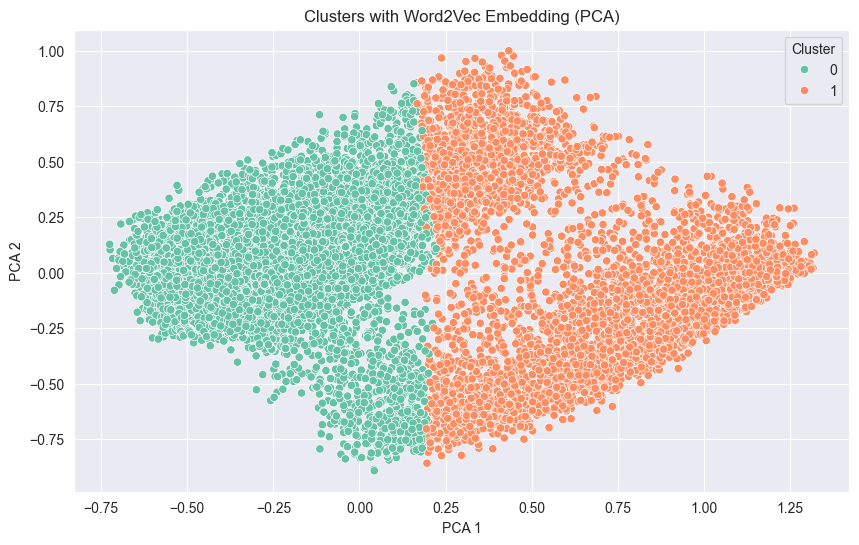

In [167]:
# PCA 시각화
pca_vi = PCA(n_components=2)
X_pca = pca_vi.fit_transform(reduced_features)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Clusters with Word2Vec Embedding (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()